# Lab 1
Reimplementing lab 1 from the DME labs

In [11]:
from __future__ import division, print_function
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from utils import col_names, relevant_indices
import math
%matplotlib inline

In [12]:
datasets = "../datasets/SuperCOSMOS/"

In [13]:
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
uki823_df.columns = col_names

In [14]:
uki823_rel_df = uki823_df.iloc[:, relevant_indices]

In [15]:
uki823_rel_df.head()

AREA     IPEAK  COSMAG      ISKY   A_U   B_U  THETA_U   A_I   B_I  THETA_I  \
0   161  42793408  -22923  17532226  7978  6626      166  4944  4524      177   
1    46   5089298  -20025  18211806  4852  3506      128  4419  3052      133   
2    87  17260390  -21479  17841694  6028  4991      119  4327  3762      121   
3    57   7749678  -20599  18688688  4842  3961      120  3950  3318      119   
4    84  14814466  -21295  17692354  5907  4798       18  4325  3741       18   

   ...  N(0,1)  PRFMAG  C_COSMAG  C_PRFMAG     RA_SDSS  DEC_SDSS  GMAG_SDSS  \
0  ...    -777  -23019    15.639    14.998  359.763288 -1.067042  19.127230   
1  ...    4639  -20435    17.703    17.800  359.880409 -0.379610  19.122244   
2  ...     -51  -21669    16.723    16.460  359.929869 -0.616716  19.118631   
3  ...    -259  -20958    17.357    17.232  359.996295 -0.297037  19.114597   
4  ...     111  -21519    16.848    16.623  359.369486 -0.591688  19.112507   

   RMAG_SDSS  IMAG_SDSS  CLASS_SDSS  
0  17.637123  15.888538           6  
1  18.505545  18.302338           6  
2  17.716108  17.013582           6  
3  18.120455  17.692406           6  
4  17.852146  17.173191           6  

[5 rows x 22 columns]

In [16]:
uki823_rel_df = uki823_df.iloc[:, relevant_indices]
uki823_rel_df.head()
# uki823_rel_df.shape[1]

AREA     IPEAK  COSMAG      ISKY   A_U   B_U  THETA_U   A_I   B_I  THETA_I  \
0   161  42793408  -22923  17532226  7978  6626      166  4944  4524      177   
1    46   5089298  -20025  18211806  4852  3506      128  4419  3052      133   
2    87  17260390  -21479  17841694  6028  4991      119  4327  3762      121   
3    57   7749678  -20599  18688688  4842  3961      120  3950  3318      119   
4    84  14814466  -21295  17692354  5907  4798       18  4325  3741       18   

   ...  N(0,1)  PRFMAG  C_COSMAG  C_PRFMAG     RA_SDSS  DEC_SDSS  GMAG_SDSS  \
0  ...    -777  -23019    15.639    14.998  359.763288 -1.067042  19.127230   
1  ...    4639  -20435    17.703    17.800  359.880409 -0.379610  19.122244   
2  ...     -51  -21669    16.723    16.460  359.929869 -0.616716  19.118631   
3  ...    -259  -20958    17.357    17.232  359.996295 -0.297037  19.114597   
4  ...     111  -21519    16.848    16.623  359.369486 -0.591688  19.112507   

   RMAG_SDSS  IMAG_SDSS  CLASS_SDSS  
0  17.637123  15.888538           6  
1  18.505545  18.302338           6  
2  17.716108  17.013582           6  
3  18.120455  17.692406           6  
4  17.852146  17.173191           6  

[5 rows x 22 columns]

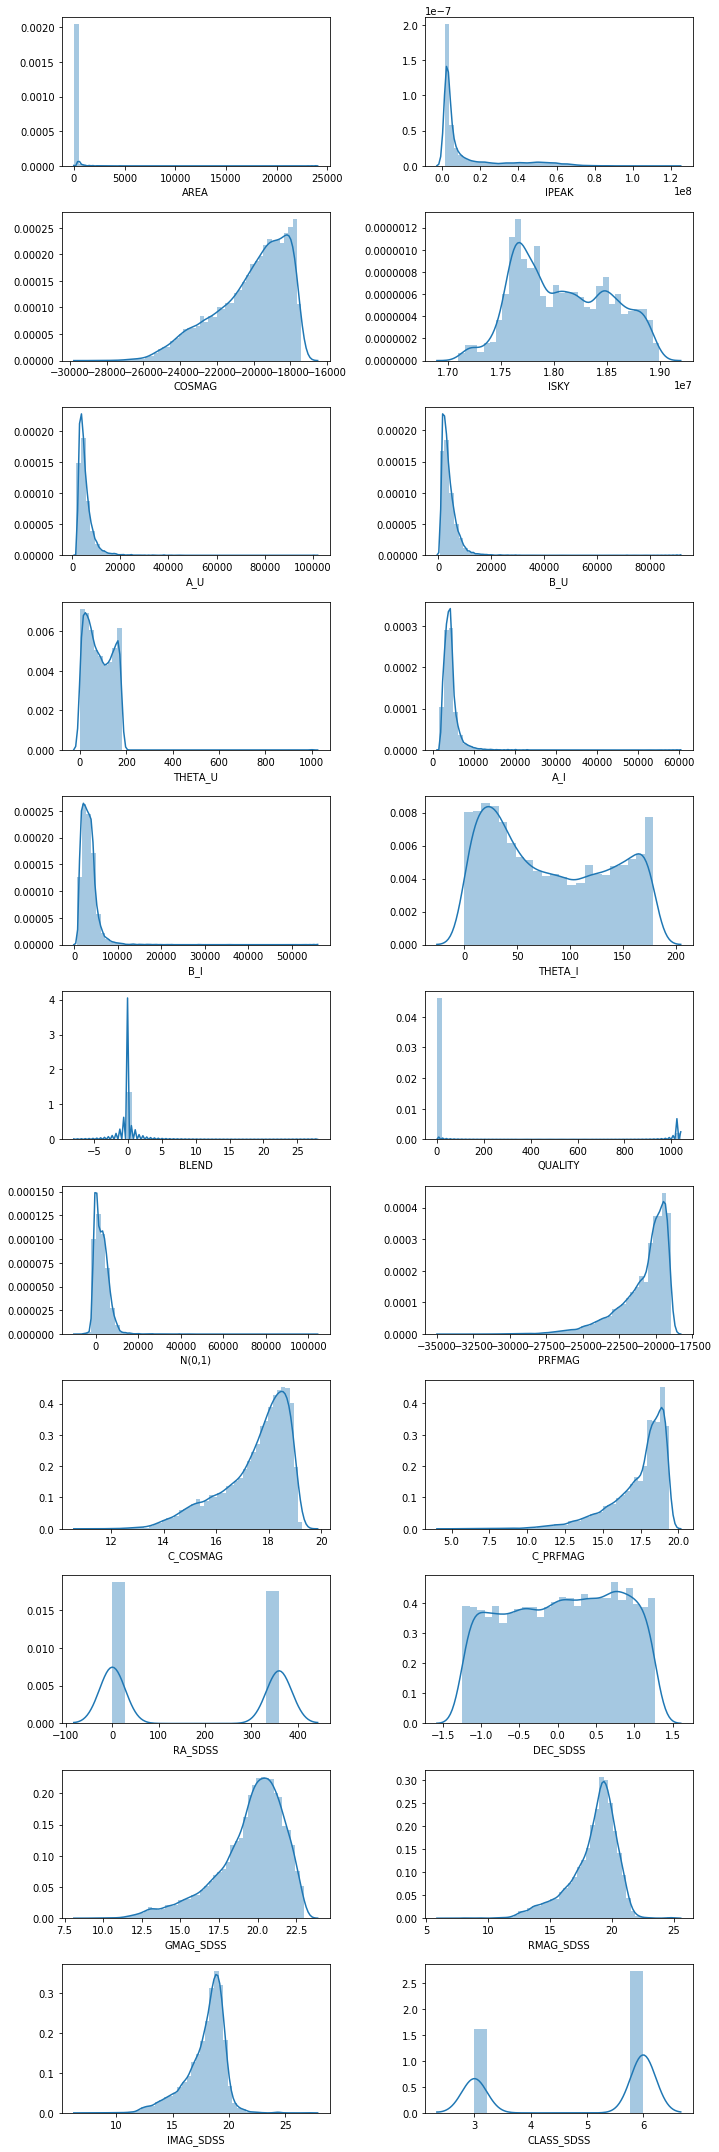

In [17]:
fig, ax = plt.subplots(math.floor(uki823_rel_df.shape[1]/2), 2, figsize=(10,30))

for ii, col in enumerate(uki823_rel_df):
    sns.distplot(uki823_rel_df[col], ax=ax[math.floor(ii / 2)][ii % 2])
    
fig.tight_layout()
plt.show()

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


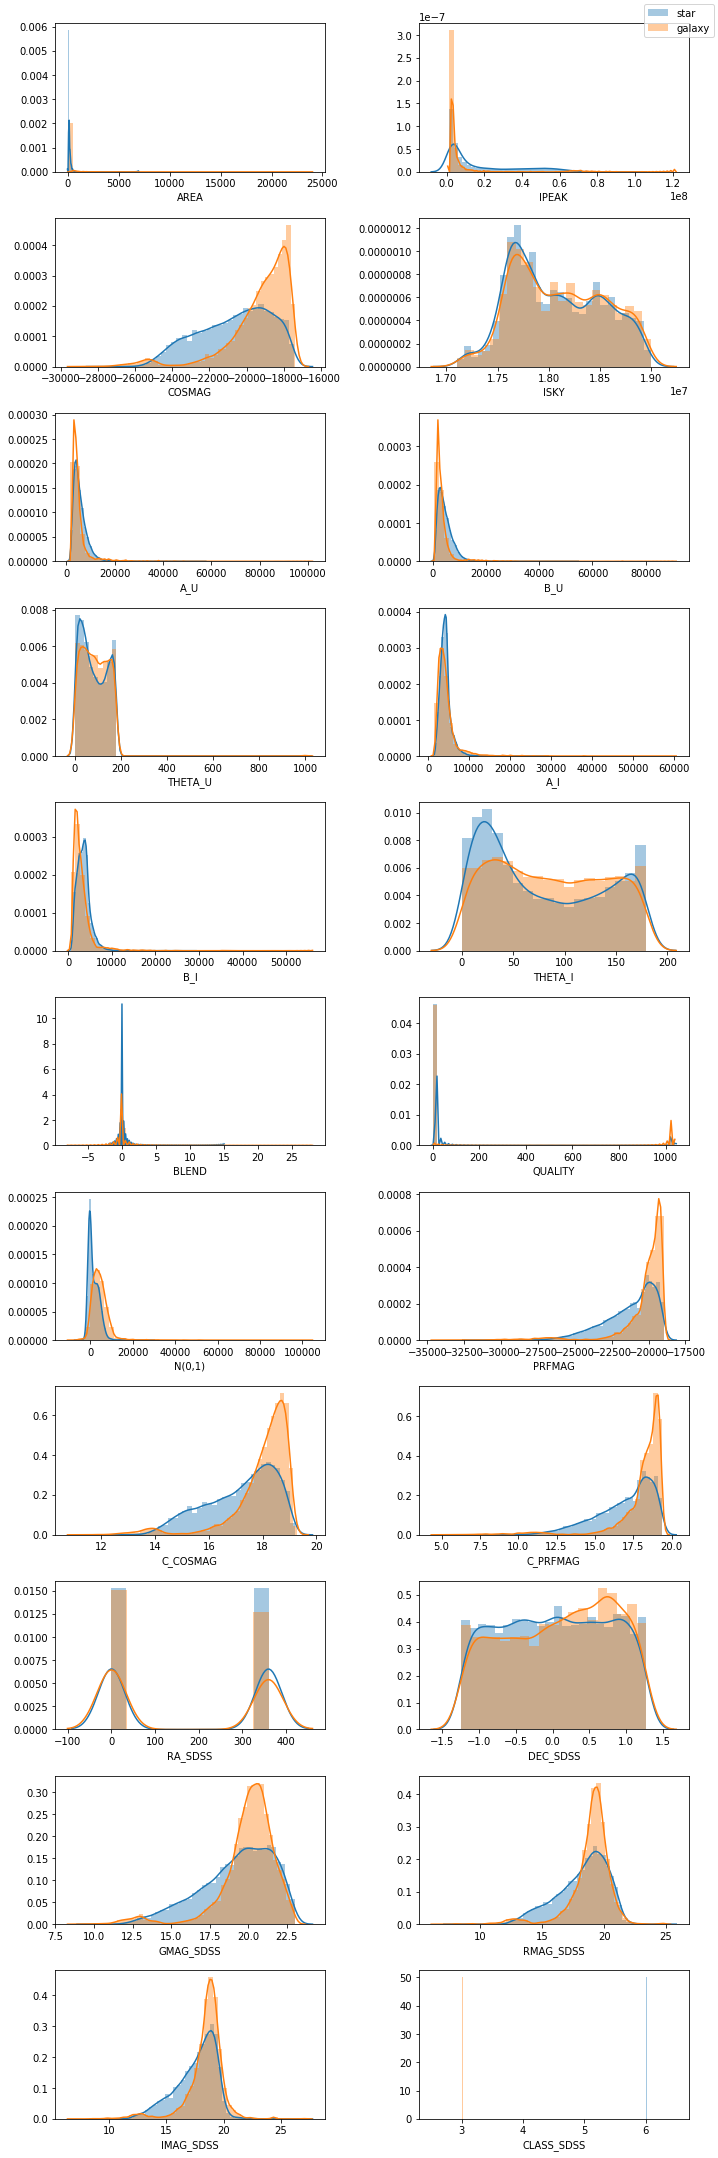

In [18]:
width = 2
fig, ax = plt.subplots(math.floor(uki823_rel_df.shape[1]/width), width, figsize=(10,30))

for ii, col in enumerate(uki823_rel_df):
    sns.distplot(uki823_rel_df[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[math.floor(ii / width)][ii % width], label="star")
    sns.distplot(uki823_rel_df[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[math.floor(ii / width)][ii % width], label="galaxy")
    
fig.legend(("star", "galaxy"))
fig.tight_layout()
plt.show()

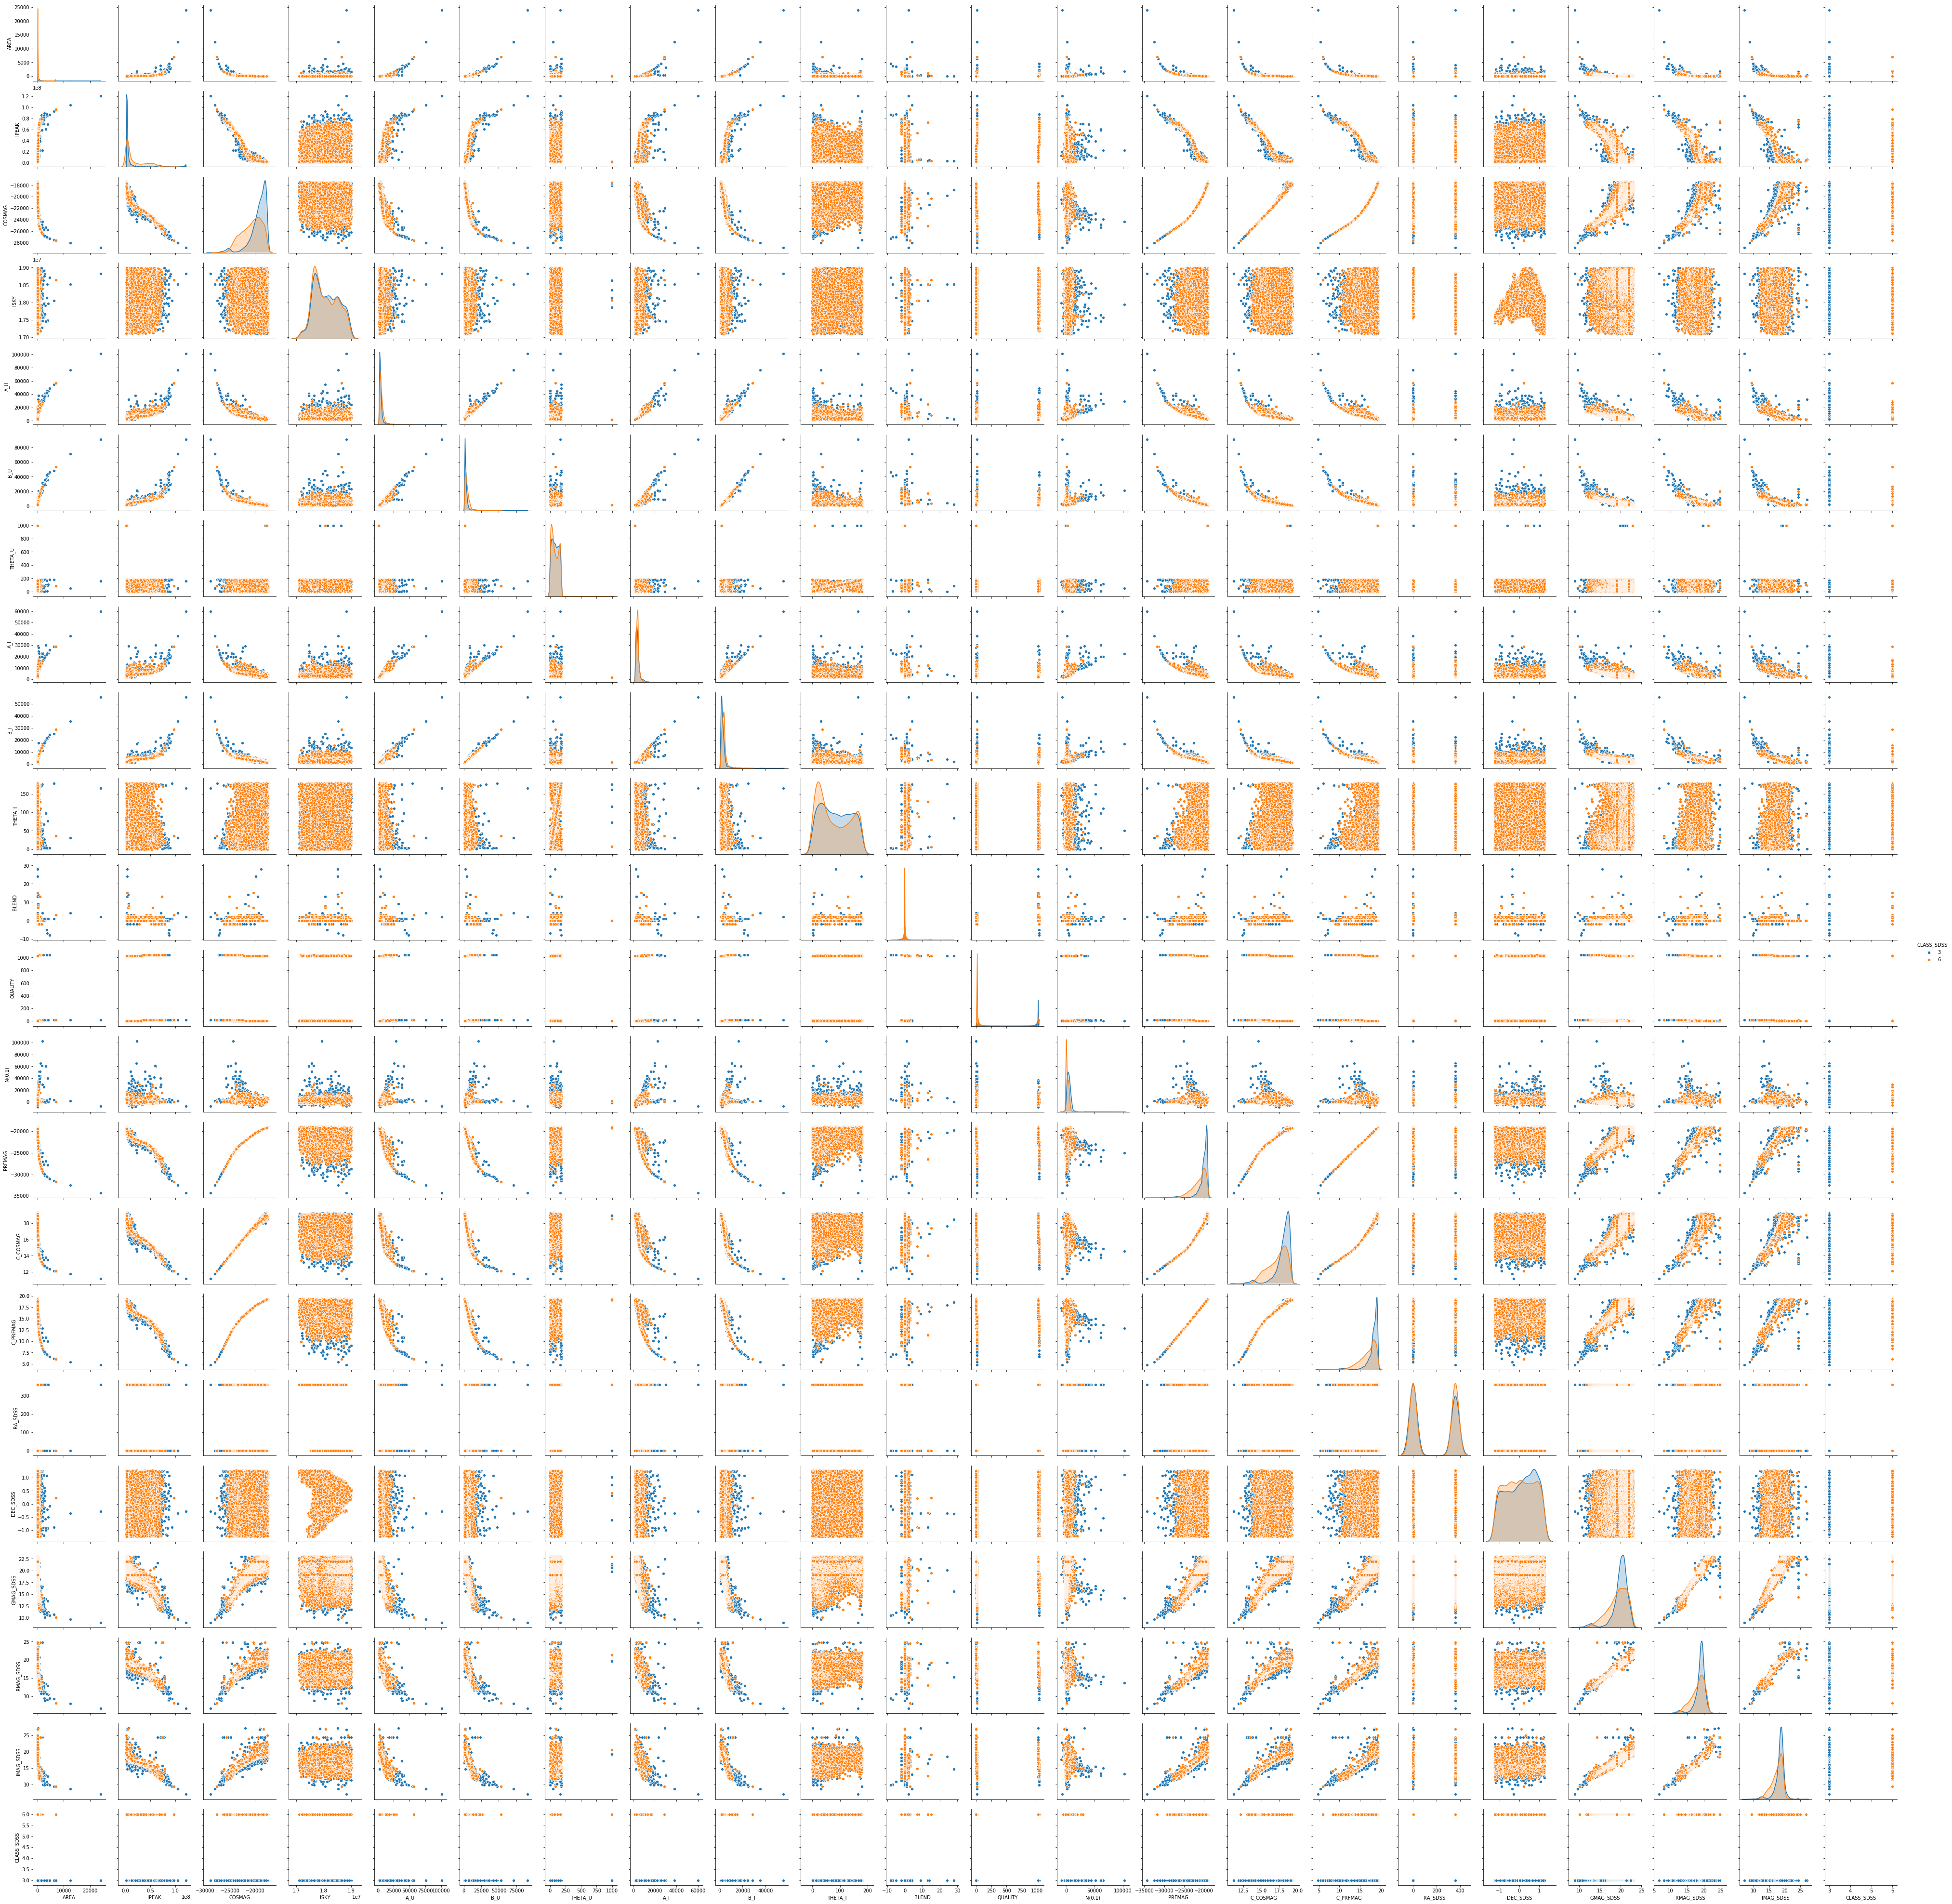

In [19]:
# sns.pairplot(uki823_rel_df, hue="CLASS_SDSS")

In [25]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y.astype('str'))
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


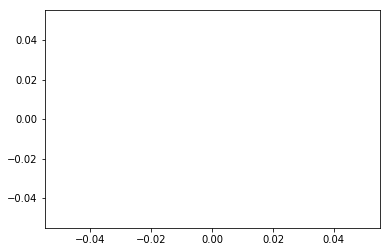

In [61]:
x_uki823 = uki823_rel_df[['AREA', 'IPEAK', 'COSMAG', 'ISKY', 'A_U', 'B_U', 'THETA_U', 'A_I',
       'B_I', 'THETA_I', 'BLEND', 'QUALITY', 'N(0,1)', 'PRFMAG', 'C_COSMAG',
       'C_PRFMAG']].values
x_uki823 = StandardScaler().fit_transform(x_uki823)

y_uki823 = uki823_rel_df.CLASS_SDSS.values

x_pca_uki823 = PCA(n_components=2).fit_transform(x_uki823)

scatter_2d_label(x_pca_uki823, y_uki823)

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


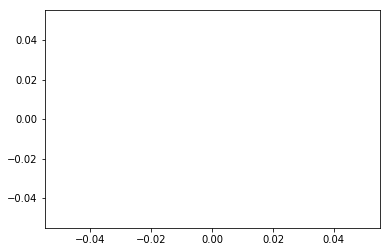

In [57]:
X = uki823_rel_df.drop("CLASS_SDSS", axis=1).values[:100]
y = uki823_rel_df.CLASS_SDSS.values[:100]

X_sc = StandardScaler().fit_transform(X)
scatter_2d_label(X_sc[:, [12,13]], y)